In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# taken from: https://stackoverflow.com/questions/2164570/reprojecting-polar-to-cartesian-grid

#!/usr/bin/env python
import numpy as np

import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as mpl

from scipy.interpolate import interp1d
from scipy.ndimage import map_coordinates


def polar2cartesian(r, t, grid, x, y, order=3):

    X, Y = np.meshgrid(x, y)

    new_r = np.sqrt(X*X+Y*Y)
    new_t = np.arctan2(X, Y)

    ir = interp1d(r, np.arange(len(r)), bounds_error=False)
    it = interp1d(t, np.arange(len(t)))

    new_ir = ir(new_r.ravel())
    new_it = it(new_t.ravel())

    new_ir[new_r.ravel() > r.max()] = len(r)-1
    new_ir[new_r.ravel() < r.min()] = 0

    return map_coordinates(grid, np.array([new_ir, new_it]),
                            order=order).reshape(new_r.shape)

# Define original polar grid

nr = 10
nt = 10

r = np.linspace(1, 100, nr)
t = np.linspace(0., np.pi, nt)
z = np.random.random((nr, nt))

# Define new cartesian grid

nx = 100
ny = 200

x = np.linspace(0., 100., nx)
y = np.linspace(-100., 100., ny)

In [10]:
r = np.linspace(1, 100, nr)
ir = interp1d(r, np.arange(len(r)), bounds_error=False) # set up interpolation function
X, Y = np.meshgrid(x, y)
new_r = np.sqrt(X*X+Y*Y)
new_ir = ir(new_r.ravel())

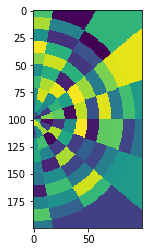

In [3]:
# Interpolate polar grid to cartesian grid (nearest neighbor)

fig = mpl.figure()
ax = fig.add_subplot(111)
ax.imshow(polar2cartesian(r, t, z, x, y, order=0), interpolation='nearest')
mpl.show()
#fig.savefig('test1.png')

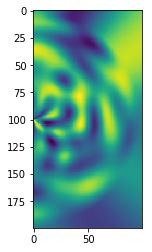

In [4]:
# Interpolate polar grid to cartesian grid (cubic spline)

fig = mpl.figure()
ax = fig.add_subplot(111)
ax.imshow(polar2cartesian(r, t, z, x, y, order=3), interpolation='nearest')
mpl.show()
#fig.savefig('test2.png')